# Modeling
In this notebook, we'll be modeling the data we've previously prepared. Out notebook will be laid out as follows:

1. Model Selection & Generation
2. Hyperparameter Optimization
3. Fine-Tuning (if needed)
4. Reporting Best Model(s) + Settings
5. Interpretation
6. Conclusion

Our eventual goal here is two-fold:

1. Accurately [and fairly] model the diabetes dataset
2. Interpret the results to find something worth recommending to those wanting to reduce risk of diabetes. This can be via LIME/SHAP (i.e. some interpretable model that approximates the neural network) or via analyzing a more simple model's structure (i.e. regression coefficients, random forest decision boundaries)

In [1]:
# Environment Setup
from utils.model import *
from utils.dataset import *

***
## Model Selection & Generation

<Train-Test Split Report>
Train: 512886 obs, 170962 no diabetes [0], 170962 pre-diabetes [1], 170962 diabetes [2]
Test: 50736 obs, 42741 no diabetes [0], 926 pre-diabetes [1], 7069 diabetes [2]


100%|██████████| 2004/2004 [00:04<00:00, 410.90it/s]


Epoch 1/50, Loss: 0.9234, Test Loss: 0.9622


100%|██████████| 2004/2004 [00:04<00:00, 418.02it/s]


Epoch 2/50, Loss: 0.8650, Test Loss: 0.8943


100%|██████████| 2004/2004 [00:04<00:00, 434.87it/s]


Epoch 3/50, Loss: 0.8146, Test Loss: 0.9235


100%|██████████| 2004/2004 [00:05<00:00, 380.56it/s]


Epoch 4/50, Loss: 0.7748, Test Loss: 0.8856


100%|██████████| 2004/2004 [00:04<00:00, 420.83it/s]


Epoch 5/50, Loss: 0.7424, Test Loss: 0.8914


100%|██████████| 2004/2004 [00:04<00:00, 437.29it/s]


Epoch 6/50, Loss: 0.7161, Test Loss: 0.8539


100%|██████████| 2004/2004 [00:04<00:00, 427.06it/s]


Epoch 7/50, Loss: 0.6932, Test Loss: 0.8597


100%|██████████| 2004/2004 [00:04<00:00, 438.78it/s]


Epoch 8/50, Loss: 0.6720, Test Loss: 0.8242


100%|██████████| 2004/2004 [00:04<00:00, 440.50it/s]


Epoch 9/50, Loss: 0.6542, Test Loss: 0.8323


100%|██████████| 2004/2004 [00:04<00:00, 432.63it/s]


Epoch 10/50, Loss: 0.6378, Test Loss: 0.8667


100%|██████████| 2004/2004 [00:04<00:00, 426.08it/s]


Epoch 11/50, Loss: 0.6236, Test Loss: 0.9068


100%|██████████| 2004/2004 [00:04<00:00, 421.29it/s]


Epoch 12/50, Loss: 0.6095, Test Loss: 0.8752


100%|██████████| 2004/2004 [00:04<00:00, 432.28it/s]


Epoch 13/50, Loss: 0.5992, Test Loss: 0.8699


100%|██████████| 2004/2004 [00:04<00:00, 421.36it/s]


Epoch 14/50, Loss: 0.5897, Test Loss: 0.8594


100%|██████████| 2004/2004 [00:04<00:00, 423.72it/s]


Epoch 15/50, Loss: 0.5800, Test Loss: 0.8953


100%|██████████| 2004/2004 [00:04<00:00, 434.22it/s]


Epoch 16/50, Loss: 0.5715, Test Loss: 0.9117


100%|██████████| 2004/2004 [00:04<00:00, 419.22it/s]


Epoch 17/50, Loss: 0.5629, Test Loss: 0.9547


100%|██████████| 2004/2004 [00:04<00:00, 424.00it/s]


Epoch 18/50, Loss: 0.5551, Test Loss: 0.9449


100%|██████████| 2004/2004 [00:04<00:00, 433.36it/s]


Epoch 19/50, Loss: 0.5480, Test Loss: 0.9495


100%|██████████| 2004/2004 [00:04<00:00, 422.83it/s]


Epoch 20/50, Loss: 0.5421, Test Loss: 0.9596


100%|██████████| 2004/2004 [00:04<00:00, 422.56it/s]


Epoch 21/50, Loss: 0.5374, Test Loss: 0.9697


100%|██████████| 2004/2004 [00:04<00:00, 432.66it/s]


Epoch 22/50, Loss: 0.5314, Test Loss: 0.9937


100%|██████████| 2004/2004 [00:04<00:00, 423.22it/s]


Epoch 23/50, Loss: 0.5270, Test Loss: 0.9857


100%|██████████| 2004/2004 [00:04<00:00, 424.91it/s]


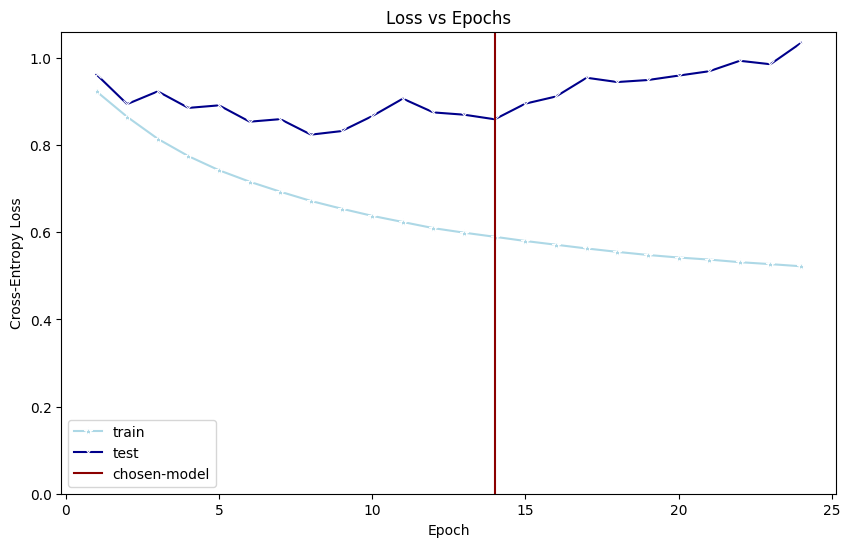


<Test Report>
Precision: [no diabetes] 0.9172978571890982, [pre-diabetes] 0.023737066342057214, [diabetes] 0.256462913747282
Recall: [no diabetes] 0.6630401721999953, [pre-diabetes] 0.08423326133909287, [diabetes] 0.6006507285330316
F1-Score: [no diabetes] 0.7697154885584301, [pre-diabetes] 0.037037037037037035, [diabetes] 0.35944973544973546
Support: [no diabetes] 42741, [pre-diabetes] 926, [diabetes] 7069
Accuracy: 64.3784%


In [2]:
# generate lookup for models
models = {
    # "tree": TreeClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet"),
    "ffnn": MLPClassifier(target="diabetes", path="../datasets/pre_split_processed.parquet")
}

# manual search
# models["tree"].set_hyperparams({
#     "loss": "log_loss",
#     "learning_rate": 0.01,
#     "n_estimators": 100,
#     "criterion": "friedman_mse",
#     "min_samples_split": 2,
#     "min_samples_leaf": 5,
#     "max_depth": 3,
#     "n_iter_no_change": 5,
#     "max_features": "log2",
#     "tol": 1e-4
# })
# models["ffnn"].set_hyperparams({
#     "learning_rate": .0005,
#     "batch_size": 256,
#     "num_hidden": 8,
#     "hidden_size": [2048, 1024, 512, 256, 128, 64, 32, 32],
#     "num_epochs": 50,
#     "dropout_rate": [0.875, 0.75, 0.75, 0.5, 0.5, 0.25, 0.25],
#     "classify_fn": "sigmoid"
# })
models["ffnn"].set_hyperparams({
    "learning_rate": .001,
    "batch_size": 256,
    "num_hidden": 2,
    "hidden_size": 128,
    "num_epochs": 50,
    "dropout_rate": 0.25,
    "classify_fn": "softmax"
})

# train & test basic model
for mt, model in models.items():
    # attempt to load, else train and test
    # if not model.load_model():
    model.train_model(verbose=2)
    model.test_model()

***
## Hyperparameter Optimization

In [3]:
# optimize hyperparams
# optimizer_results = {model_type: model.optimize_hyperparams(kfold=2) for model_type, model in models.items()}
# print(optimizer_results)

***
## Fine-Tuning + Other Adjustments

***
## Best Model Report

***
## Interpretation

***
## Conclusion